In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import random
import copy
import json
import pandas as pd
import seaborn as sns

from helpers.helper import get_cath
from Bio import SeqIO
from os import listdir
from os.path import isfile, join


In [41]:
# sort proteins by number of domains and seperate
# maximum number of domains is 6

# domain_chains_dict = {
    
# }


# lengths = {}
# for code, info in cath.items():
#     chains = info.keys()
#     for chain in chains:
#         domains = cath[code][chain]
#         no_of_domains = len(domains)
#         lengths[str(no_of_domains)] = lengths.get(str(no_of_domains), 0) + 1

# for n in lengths.keys():
#     domain_chains_dict[n] = []

# for code, info in cath.items():
#     chains = info.keys()
#     for chain in chains:
#         domains = cath[code][chain]
#         no_of_domains = len(domains)
#         domain_chains_dict[str(no_of_domains)].append(f'{code}:{chain}')


# random_sample = {}
# for size, chains in domain_chains_dict.items():
#     x = len(chains)
#     random_sample[size] = random.sample(chains, min(2500, x))


In [42]:
with open('../data/cath/random_balanced/result.json') as f:
    random_sample = json.load(f)

In [43]:
# number of chains for each size from 6 chains and upwards, accumulated
for i in range(1,21):
    s = str(i)
    if s in random_sample.keys():
        l = len(random_sample[s])
        print(s, l)

1 2500
2 2500
3 2500
4 2500
5 2338
6 863
7 160
8 419
9 75
10 44
11 4
12 21
13 29
14 1
16 8
19 1
20 2


In [44]:
# number of chains for each size from 6 chains and upwards, accumulated
acc = []
for i in range(6,21):
    s = str(i)
    if s in random_sample.keys():
        l = len(random_sample[s])
        acc.append(l)

print(sum(acc))

1627


In [45]:
# total number of chains
all = [len(x) for x in random_sample.values()]
print(sum(all))

13965


In [46]:
# visualisations of all data

# data from CATH (v. 4.3)
# http://download.cathdb.info/cath/releases/all-releases/v4_3_0/cath-classification-data/

# data = {i : len(domain_chains_dict[str(i)]) for i in domain_chains_dict.keys}

# domains = [str(i) for i in range(1,21)]
# size = [len(domain_chains_dict.get(str(i),[] )) for i in range(1,21)]

# fig = plt.figure(figsize = (14, 13))

# # creating the bar plot
# plt.bar(domains, size, width = 0.4)

# plt.xlabel("Number of domains")
# plt.ylabel("Number of chains")
# plt.title("")
# plt.show()

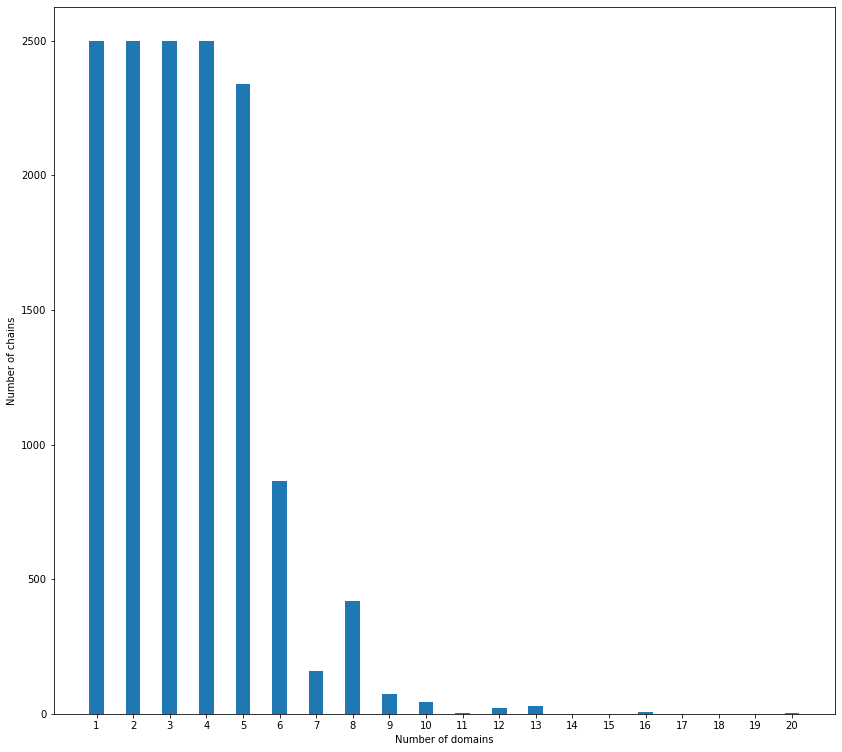

Chains with 1 domains: 2500
Chains with 2 domains: 2500
Chains with 3 domains: 2500
Chains with 4 domains: 2500
Chains with 8 domains: 419
Chains with 7 domains: 160
Chains with 6 domains: 863
Chains with 5 domains: 2338
Chains with 10 domains: 44
Chains with 9 domains: 75
Chains with 12 domains: 21
Chains with 13 domains: 29
Chains with 11 domains: 4
Chains with 20 domains: 2
Chains with 19 domains: 1
Chains with 16 domains: 8
Chains with 14 domains: 1


In [47]:
domains = [str(i) for i in range(1,21)]
size = [len(random_sample.get(str(i),[] )) for i in range(1,21)]

fig = plt.figure(figsize = (14, 13))

# creating the bar plot
plt.bar(domains, size, width = 0.4)

plt.xlabel("Number of domains")
plt.ylabel("Number of chains")
plt.title("")
plt.show()

for k in [int(x) for x in random_sample.keys()]:
    print(f"Chains with {k} domains: {len(random_sample[str(k)])}")

In [48]:
# create comma seperated codes for bulk download
codes = []
for k, v in random_sample.items():
    for chain in v:
        codes.append(chain[:4] + ',')

In [49]:
for k, v in random_sample.items():
    print(len(v))

2500
2500
2500
2500
419
160
863
2338
44
75
21
29
4
2
1
8
1


In [50]:
for k, v in random_sample.items():
    print(len(set(v)))

2500
2500
2500
2500
419
160
863
2338
44
75
21
29
4
2
1
8
1


In [51]:
with open('../data/pdb/bulk/balanced/balanced.txt', 'w') as f:
    f.writelines(codes)

In [52]:
random_sample_keys = []
for k, v in random_sample.items():
    for code in v:
        random_sample_keys.append(code)

In [53]:
len(random_sample_keys)

13965

In [54]:
# remove duplicates

random_sample_keys = list(set(random_sample_keys))

In [55]:
len(random_sample_keys)

13965

In [27]:
# print(sorted(random_sample_keys))

In [56]:
# function to figure how many domains a chain has (from the sample dict):
def domains_from_chain(chain):
    chain = chain.lower()
    for k, v in random_sample.items():
        v = [x.lower() for x in v]
        if chain in v:
            # print(f"{chain} has {k} domains")
            return k
    print(f"didn't find {chain}")
    

In [81]:
x = next(SeqIO.parse(f'../data/pdb/bulk/balanced/backup/data/5oys.pdb', 'pdb-seqres'))
# {record.id: record.seq for record in x}
x

SeqRecord(seq=Seq('STGSATTTPIDSLDDAYITPVQIGTPAQTLNLDFDTGSSDLWVFSSETTASEVD...ASK'), id='5OYQ:A', name='5OYQ:A', description='UNP:P11838 CARP_CRYPA', dbxrefs=['UNP:P11838', 'UNP:CARP_CRYPA'])

In [83]:
# find the chains to remove from dataset either because they are not found in PDB files

mypath = '../data/pdb/bulk/balanced/backup/data/'

files = [f for f in listdir(mypath) if isfile(join(mypath, f))]
# codes = [x[:4] for x in files]
missing = []
too_long = []

# find the missing chains

chains_of_interest = []
for key in random_sample_keys:
    file = key[:4] + '.pdb'
    PDB_file_path = f'{mypath}{file}'
    try:
        chains = {record.id: record.seq for record in SeqIO.parse(PDB_file_path, 'pdb-seqres')}
    except FileNotFoundError:
        print("File does not exist", key)
        print()
        missing.append(key)
        continue

    # chains.keys() take weird formats some times so try different formats
    # this: key2 = key[:-1] + key[-1].lower() isnt used because lower case chain letters are different from upper base
    key = key[:4].upper() + key[4:]
    key2 = key[-1]
    if (key not in chains.keys()) and (key2 not in chains.keys()):
        # missing.append(key)
        print("using", key)
        print(chains.keys())
        # print(file)
        # print()
        missing.append(key)

    keys = [key, key2]
    for k in keys:
        if k in chains.keys():
            seq = chains[k]
            break

    if len(seq) > 2000:
        too_long.append(key)

    

using 5OYS:A
dict_keys(['5OYQ:A'])
File does not exist 5exc:G

using 5P1Y:A
dict_keys(['5OYQ:A'])
using 5P6J:A
dict_keys(['5OYQ:A'])
using 5P3I:A
dict_keys(['5OYQ:A'])
using 5P6L:A
dict_keys(['5OYQ:A'])
using 1TDM:0
dict_keys([' '])
using 5P6Y:A
dict_keys(['5OYQ:A'])
using 5P30:A
dict_keys(['5OYQ:A'])
using 5OZK:A
dict_keys(['5OYQ:A'])
using 5P5D:A
dict_keys(['5OYQ:A'])
using 5P1U:A
dict_keys(['5OYQ:A'])
using 5P03:A
dict_keys(['5OYQ:A'])
File does not exist 1bos:J

using 5P8N:A
dict_keys(['5OYQ:A'])
using 1BUK:0
dict_keys(['1BUK: '])
using 1ALO:0
dict_keys(['1ALO: '])
using 5P7E:A
dict_keys(['5OYQ:A'])


Missing before when used lower case chain letter:
['5OYS:A',
 '5P7E:A',
 '5P8N:A',
 '5EXC:G',
 '5P5D:A',
 '1TDM:0',
 '5OZK:A',
 '5P6L:A',
 '5P6Y:A',
 '1BUK:0',
 '1BOS:J',
 '5P3I:A',
 '1ALO:0',
 '5P1Y:A',
 '5P1U:A',
 '5P6J:A',
 '5P03:A',
 '5P30:A']

 Total: 18

In [84]:
print("Missing:", len(missing))
print("Too long:", len(too_long))

Missing: 18
Too long: 44


In [86]:
print("Before:", len(random_sample_keys))
print("Expected after:", len(random_sample_keys) - (len(missing) + len(too_long)))

Before: 13965
Expected after: 13903


In [31]:
# for c in missing:
#     print(c, "has", domains_from_chain(c))

### Finally

After performing stratified sampling and downloading the data, only 20 chains were missings. The results are shown below

In [24]:
# # too long: (> 2000)
# too_long = ['3VKG:B','2VZ8:A','2VZ8:B','2VZ9:A','2VZ9:B','2PFF:H','2PFF:E','2PFF:B','5LJ5:B','5GAO:B','3JCM:N','5GAN:B','3HMJ:H','2UVA:L','2UVC:I','2UVA:G','2UVC:H','2UVA:K','2UV8:H','2VKZ:H','3HMJ:G','2UV8:G','2UV8:I','2UVA:I','2UVA:J','2UVC:L','2UVC:G','2VKZ:I','3HMJ:I','2UVA:H','2UVC:J','2UVC:K','2VKZ:G','3VKH:B','3VKG:A','3VKH:A','4AKI:A','4AI6:B','4AKG:A','4AKG:B','4AI6:A','4AKH:A','4AKH:B','4AKI:B']
# # too_long

In [87]:
true_random_sample = copy.deepcopy(random_sample)
for chain in missing:
    chain = chain[:-1].lower() + chain[-1]
    # print(chain)
    n = domains_from_chain(chain)
    try:
        true_random_sample[str(n)].remove(chain)
    except ValueError:
        print(chain, "not in") # probably removed already


for chain in too_long:
    chain = chain[:-1].lower() + chain[-1]
    # print(chain)
    n = domains_from_chain(chain)
    try:
        true_random_sample[str(n)].remove(chain)
    except ValueError:
        print(chain, "not in") # probably removed already

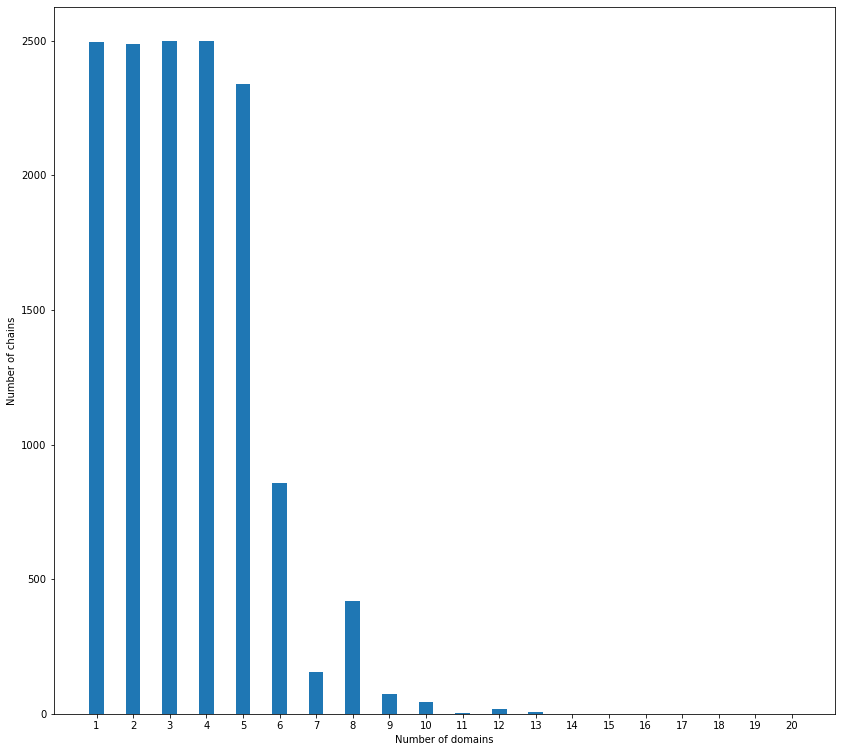

Chains with 1 domains: 2497
Chains with 2 domains: 2487
Chains with 3 domains: 2500
Chains with 4 domains: 2500
Chains with 5 domains: 2338
Chains with 6 domains: 859
Chains with 7 domains: 155
Chains with 8 domains: 418
Chains with 9 domains: 75
Chains with 10 domains: 44
Chains with 11 domains: 4
Chains with 12 domains: 18
Chains with 13 domains: 7
Chains with 14 domains: 1
Chains with 16 domains: 0
Chains with 19 domains: 0
Chains with 20 domains: 0


In [89]:
domains = [str(i) for i in range(1,21)]
size = [len(true_random_sample.get(str(i),[] )) for i in range(1,21)]

fig = plt.figure(figsize = (14, 13))

# creating the bar plot
plt.bar(domains, size, width = 0.4)

plt.xlabel("Number of domains")
plt.ylabel("Number of chains")
plt.title("")
plt.show()

for k in range(1, 21):
    try:
        print(f"Chains with {k} domains: {len(true_random_sample[str(k)])}")
    except KeyError:
        continue

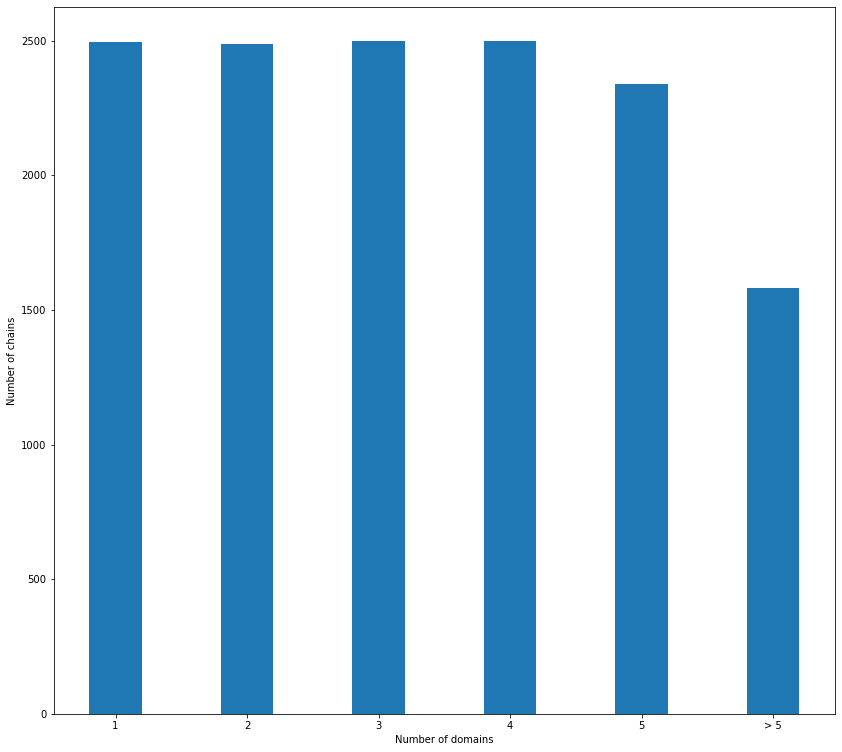

Chains with 1 domains: 2497
Chains with 2 domains: 2487
Chains with 3 domains: 2500
Chains with 4 domains: 2500
Chains with 5 domains: 2338
Chains with > 5 domains: 1581


In [90]:
n = 6
domains = [str(i) for i in range(1,n)]
size = [len(true_random_sample.get(str(i),[] )) for i in range(1,n)]

more_than_n = sum([len(true_random_sample.get(str(i),[] )) for i in range(n,21)])

domains.append('> 5')
size.append(more_than_n)

fig = plt.figure(figsize = (14, 13))

# creating the bar plot
plt.bar(domains, size, width = 0.4)

plt.xlabel("Number of domains")
plt.ylabel("Number of chains")
plt.title("")
plt.show()

for k in range(1, n):
    try:
        print(f"Chains with {k} domains: {len(true_random_sample[str(k)])}")
    except KeyError:
        continue

print(f"Chains with > {n-1} domains: {more_than_n}")


In [110]:
# too_long = []

code_to_seq = {}

densities = {
    '1' : [],
    '2' : [],
    '3' : [],
    '4' : [],
    '5' : [],
    '> 5' : []
    }
n = 6
for dom, lst in true_random_sample.items():
    tmp = []
    for key in lst:
        pdb_code = key[:4]
        
        pdb_file_path = f'../data/pdb/bulk/balanced/backup/data/{pdb_code}.pdb'

        chains = {record.id: record.seq for record in SeqIO.parse(pdb_file_path, 'pdb-seqres')}

        key = key[:4].upper() + key[4:]
        key2 = key[-1]
        keys = [key, key2]
        
        for k in keys:
            if k in chains.keys():
                seq = chains[k]
                break

        if int(dom) >= 6:
            densities['> 5'].append(len(seq))
        else:
            densities[dom].append(len(seq))

        # write the pdb : seq to a dict
        if code_to_seq.get(key, None):
            print(key)

        code_to_seq[key] = seq

        

In [111]:
densities

{'1': [90,
  262,
  229,
  125,
  53,
  276,
  86,
  316,
  122,
  119,
  425,
  102,
  91,
  183,
  251,
  272,
  209,
  249,
  176,
  92,
  218,
  449,
  106,
  277,
  126,
  52,
  91,
  113,
  105,
  139,
  218,
  210,
  216,
  64,
  314,
  245,
  315,
  110,
  124,
  119,
  77,
  108,
  363,
  60,
  79,
  131,
  56,
  174,
  312,
  44,
  80,
  180,
  140,
  146,
  102,
  229,
  138,
  258,
  165,
  129,
  110,
  212,
  236,
  352,
  240,
  94,
  76,
  51,
  341,
  82,
  62,
  246,
  162,
  66,
  217,
  240,
  245,
  167,
  119,
  229,
  206,
  573,
  169,
  381,
  363,
  157,
  302,
  155,
  282,
  382,
  155,
  106,
  141,
  330,
  297,
  193,
  245,
  212,
  122,
  143,
  259,
  142,
  264,
  295,
  169,
  125,
  176,
  262,
  309,
  205,
  87,
  93,
  140,
  212,
  103,
  231,
  153,
  367,
  543,
  275,
  205,
  90,
  311,
  108,
  377,
  267,
  194,
  185,
  86,
  351,
  275,
  229,
  127,
  148,
  197,
  183,
  70,
  141,
  220,
  537,
  286,
  158,
  350,
  43,
  74,
  128,


In [112]:
print("Actual:", len(code_to_seq))

Actual: 13903


Before removing key2 (lower chain stuff): 13902

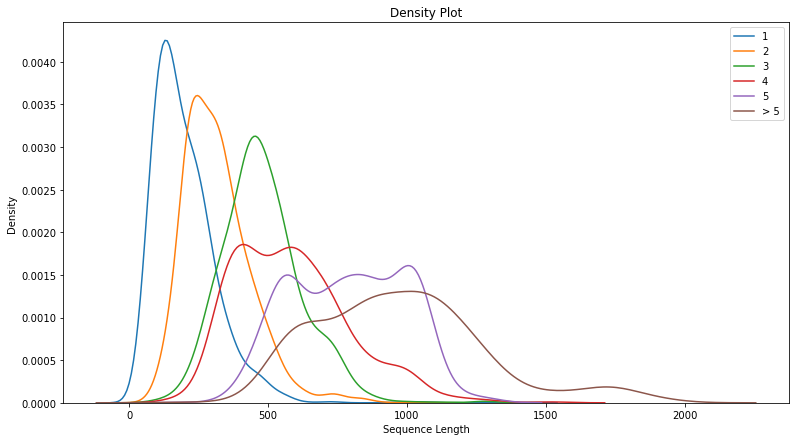

In [113]:
fig = plt.figure(figsize = (13, 7))
labels = []

for k, v in densities.items():
    sns.kdeplot(data=v, bw_adjust=1.5)
    labels.append(k)

plt.legend(labels=labels)
plt.xlabel("Sequence Length")    
plt.title("Density Plot")
plt.show()

In [114]:
true_random_sample_keys = []
for v in true_random_sample.values():
    for chain in v:
        true_random_sample_keys.append(chain)

In [115]:
len(true_random_sample_keys)

13903

In [116]:
with open('../data/cath/true_random_sample_keys.txt', 'w') as f:
    f.writelines([x + '\n' for x in true_random_sample_keys])

In [42]:
# true_random_sample_keys = []

# with open('../data/cath/true_random_sample_keys.txt', 'r') as f:
#     for line in f.readlines():
#         true_random_sample_keys.append(line.strip())

In [118]:
len(set(true_random_sample_keys))
# must be 13903 (was 13947 before too_long)

13903

In [45]:
# write the pdb codes to a file to create the mappings

# codes = []
# for code in true_random_sample_keys:
#     code = code[:4]
#     codes.append(code + ",")

# with open('../data/cath/codes_list.txt', 'w') as f:
#     f.writelines(codes)

In [119]:
# len(set(codes))

11076

In [120]:
# create a pdb code to seq dict and export to json
key_to_seq_dict = {}
for key in true_random_sample_keys:

    pdb_code = chain[:4]
    
    pdb_file_path = f'../data/pdb/bulk/balanced/backup/data/{pdb_code}.pdb'

    chains = {record.id: record.seq for record in SeqIO.parse(pdb_file_path, 'pdb-seqres')}

    key = key[:4].upper() + key[4:]
    key2 = key[-1]
    keys = [key, key2]

    for k in keys:
        if k in chains.keys():
            seq = chains[k]
            break

    key_to_seq_dict[chain] = str(seq)

In [121]:
with open('../data/cath/key_to_seq_dict.json', 'w') as fp:
    json.dump(key_to_seq_dict, fp)

In [32]:
np.random.seed(0)
num_samples = 20
K =2
indices = np.arange(num_samples)
np.random.shuffle(indices)
folds = np.array_split(indices, K)
folds
# for k in range(5):
#     # Get the validation fold
# 	validation_indices = folds[k]

#     # Get the training folds
# 	training_indices = np.concatenate([folds[i] for i in range(5) if i != k])
# 	print(training_indices)

[array([18,  1, 19,  8, 10, 17,  6, 13,  4,  2]),
 array([ 5, 14,  9,  7, 16, 11,  3,  0, 15, 12])]

### Create the DataFrame from the balanced data

#### One-Hot

In [49]:
# DOUBLE CHECK THAT NOTHING IS MISSING

# mypath = '../data/pdb/bulk/balanced/backup/data/'

# files = [f for f in listdir(mypath) if isfile(join(mypath, f))]
# # codes = [x[:4] for x in files]
# missing = []

# chains_of_interest = []
# for key in true_random_sample_keys:
#     key = key.upper()
#     file = key[:4].lower() + '.pdb'
#     PDB_file_path = f'{mypath}{file}'
#     chains = {record.id: record.seq for record in SeqIO.parse(PDB_file_path, 'pdb-seqres')}


#     # chains.keys() take weird formats some times so try different formats
#     key2 = key[:-1] + key[-1].lower()
#     key3 = key[-1]
#     if (key not in chains.keys()) and (key2 not in chains.keys()) and (key3 not in chains.keys()):
#         print(key)
#         print(chains.keys())
#         print()

In [50]:
def one_hot_seq(seq):
    amino_acids = 'ACDEFGHIKLMNPQRSTVWY'
    encoded = np.array([1 if elt == 'A' else 0 for elt in seq],dtype=np.float64)
    # start from the second element since the first one is A and was created above
    for amino_acid in amino_acids[1:]:
        new = np.array([1 if elt == amino_acid else 0 for elt in seq])
        encoded = np.vstack((encoded, new))
    return encoded


# def boundariesN(seq, domain, n):
#     # return the boundaries from a sequence and a domain
#     # seq is only used for getting the length
#     bounds = np.zeros((len(seq)), dtype=np.int8)

#     for k, v in domain.items():
#         boundary_positions = v.split(',')
#         for b in boundary_positions:
#             indices = [int(i) for i in b.split('-')]
#             for i in indices:
#                 low = max(i - n, 1)
#                 high = min(i + n, len(seq))
#                 for j in range(low, high + 1):
#                     bounds[j - 1] = 1
#     return np.array(bounds, dtype=np.float64)


def longest_series(seq):
    longest_local = 0
    longest_global = 0
    for elt in seq:
        if elt == 1:
            longest_local += 1

        if elt == 0:
            if longest_local > longest_global:
                longest_global = longest_local
            longest_local = 0

    return longest_global


def median_seq(seq):
    # parse a sequence (which will be the output from the model)
    # for every series of consecutive ones, leave only the median as one - the rest turn to 0
    # seq = [1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,1,0,1,1]
    new_seq = np.zeros(len(seq))
    consecutive_ones_indices = []
    medians = []

    # marks if the first consecutive zeros that are less than the typical size is the first (meaning is the beginning of the first domain)
    flag = True 

    longest = longest_series(seq)

    for i in range(len(seq)):
        if seq[i] == 0:
            if len(consecutive_ones_indices) > 0:
                if len(consecutive_ones_indices) < longest:
                    if flag:
                        medians.append(consecutive_ones_indices[0])
                        flag = False
                    else:
                        medians.append(consecutive_ones_indices[-1])
                else:
                    medians.append(int(np.median(consecutive_ones_indices)))
            consecutive_ones_indices = []

        if seq[i] == 1:
            consecutive_ones_indices.append(i)

    if len(consecutive_ones_indices) > 0:
        if len(consecutive_ones_indices) < longest:
            if flag:
                medians.append(consecutive_ones_indices[0])
            else:
                medians.append(consecutive_ones_indices[-1])
        else:
            medians.append(int(np.median(consecutive_ones_indices)))

    for elt in medians:
        new_seq[elt] = 1

    return new_seq


def boundariesN(seq, domain, n):
    # return the boundaries from a sequence and a domain
    # seq is only used for getting the length
    # the boundary is the start of every domain plus the end of the last domain
    # bounds = [0] * n + [0] * len(seq) + [0] * n

    bounds = np.zeros((len(seq)), dtype=np.int8)
    last_end = 0
    for k, v in domain.items():
        boundary_positions = v.split(',')
        for b in boundary_positions:
            start, end = [int(i) for i in b.split('-')]
            if end > last_end:
                last_end = end
            low = max(start - n, 1)
            high = min(start + n, len(seq))
            for j in range(low, high + 1):
                bounds[j - 1] = 1

    low = max(last_end - n, 1)
    high = min(last_end + n, len(seq))
    for j in range(low, high + 1):
        bounds[j - 1] = 1    

    # bounds = median_seq(bounds)
    # bounds = bounds[n:len(bounds)-2]  
    # print(len(bounds))
            
    return np.array(bounds, dtype=np.float64)

In [51]:
# s='ACDEFGHIKLMNPQRSTVWYACDEFGHIKLMNPQRSTVWY'
# d = {
#     '1' : '1-19,31-40',
#     '2' : '20-31'
# }
# seq = boundariesN(s,d,2)
# seq
# # print(median_seq(seq))

In [52]:
# s='ACDEFGHIKLMNPQRSTVWYACDEFGHIKLMNPQRSTVWY'
# d = {
#     '1' : '1-19,31-41',
#     '2' : '20-31'
# }
# # boundariesN(s,d,2)

# # analyse why some targets look like this : [1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1]
# ANSWER: low = max(i - n, 0) caused j to become -1 affecting the last element. Changed to: low = max(i - n, 1)

# for chain in true_random_sample_keys:

#     pdb_code = chain[:4]
    
#     pdb_file_path = f'../data/pdb/bulk/balanced/backup/data/{pdb_code}.pdb'

#     chains = {record.id: record.seq for record in SeqIO.parse(pdb_file_path, 'pdb-seqres')}

#     key = chain.upper()
#     key2 = key[:-1] + key[-1].lower()
#     key3 = key[-1]

#     keys = [key, key2, key3]

#     found = False
#     for k in keys:
#         if k in chains.keys():
#             seq = chains[k]
#             break

#     domain = cath[pdb_code][chain[-1]]
#     target = boundariesN(seq, domain, 8)
#     print(domain)
#     print(len(seq))
#     print(target)
#     break

In [53]:
df = pd.DataFrame(columns=['in', 'out'])
df['in'] = df['in'].astype(object)
df['out'] = df['out'].astype(object)

counter = 0

for chain in true_random_sample_keys:

    pdb_code = chain[:4]
    
    pdb_file_path = f'../data/pdb/bulk/balanced/backup/data/{pdb_code}.pdb'

    chains = {record.id: record.seq for record in SeqIO.parse(pdb_file_path, 'pdb-seqres')}

    key = chain.upper()
    key2 = key[:-1] + key[-1].lower()
    key3 = key[-1]

    keys = [key, key2, key3]

    found = False
    for k in keys:
        if k in chains.keys():
            seq = chains[k]
            break

    input = one_hot_seq(seq)
    domain = cath[pdb_code][chain[-1]]
    target = boundariesN(seq, domain, 8)

    new_df = pd.DataFrame({'in':[input], 'out':[target]})
    df = pd.concat([df,new_df], ignore_index=True)
    counter += 1
    if counter % 1000 == 0:
        print(f'Written {counter}/{len(true_random_sample_keys)} entries')

print(f'Written {counter}/{len(true_random_sample_keys)} entries')

Written 1000/13903 entries
Written 2000/13903 entries
Written 3000/13903 entries
Written 4000/13903 entries
Written 5000/13903 entries
Written 6000/13903 entries
Written 7000/13903 entries
Written 8000/13903 entries
Written 9000/13903 entries
Written 10000/13903 entries
Written 11000/13903 entries
Written 12000/13903 entries
Written 13000/13903 entries
Written 13903/13903 entries


In [54]:
df.to_pickle('../data/training/one_hot/data8.csv')

In [55]:
test = pd.read_pickle('../data/training/one_hot/data8.csv')
len(test)

13903

#### CARP Embeddings

Convolutional Autoencoder Representation of Proteins

In [56]:
from sequence_models.pretrained import load_model_and_alphabet

In [57]:
model, collater = load_model_and_alphabet('../pretrained_esm/microsoft/carp_600k.pt')

In [58]:
true_random_sample_keys[:5]

['3p6y:P', '3k8g:A', '3e2w:C', '3lel:R', '1jy3:Q']

In [59]:
df = pd.DataFrame(columns=['in', 'out'])
df['in'] = df['in'].astype(object)
df['out'] = df['out'].astype(object)

counter = 0

for chain in true_random_sample_keys:

    pdb_code = chain[:4]
    
    pdb_file_path = f'../data/pdb/bulk/balanced/backup/data/{pdb_code}.pdb'

    chains = {record.id: record.seq for record in SeqIO.parse(pdb_file_path, 'pdb-seqres')}

    key = chain.upper()
    key2 = key[:-1] + key[-1].lower()
    key3 = key[-1]

    keys = [key, key2, key3]

    for k in keys:
        if k in chains.keys():
            seq = chains[k]
            break


    # seqs = [[seq]]
    # x = collater(seqs)[0] # (n, max_len)
    # rep = model(x)  # (n, max_len, d_model)
    # input = rep['representations'][16][0].detach().numpy()
    if pdb_code == '6bk8'
    domain = cath[pdb_code][chain[-1]]
#     target = boundariesN(seq, domain, 8)

#     new_df = pd.DataFrame({'in':[input], 'out':[target]})
#     df = pd.concat([df,new_df], ignore_index=True)
#     counter += 1
#     if counter % 1000 == 0:
#         print(f'Written {counter}/{len(true_random_sample_keys)} entries')

# print(f'Written {counter}/{len(true_random_sample_keys)} entries')

SyntaxError: invalid syntax (1007878835.py, line 31)

In [ ]:
df.to_pickle('../data/training/carp/data8.csv')

In [ ]:
len(pd.read_pickle('../data/training/carp/data8.csv'))

13903

# Testing if Bio from SeqIO is good

In [96]:
for chain in true_random_sample_keys:
    pdb_code = chain[:4]
    
    pdb_file_path = f'../data/pdb/bulk/balanced/backup/data/{pdb_code}.pdb'

    chains = {record.id: record.seq for record in SeqIO.parse(pdb_file_path, 'pdb-seqres')}

    key = chain.upper()
    # key2 = key[:-1] + key[-1].lower()
    key3 = key[-1]

    keys = [key, key3]

    found = False
    for k in keys:
        if k in chains.keys():
            seq = chains[k]
            found = True
            break
    if found == False:
        print(chain)
        print(chains)
        break

6bk8:c
{'6BK8:2': Seq('XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...XXX'), '5': Seq('XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...XXX'), '6': Seq('XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...XXX'), '6BK8:A': Seq('MSGLPPPPPGFEEDSDLALPPPPPPPPGYEIEELDNPMVPSSVNEDTFLPPPPP...VFS'), '6BK8:B': Seq('MEGDDLFDEFGNLIGVDPFDSDEEESVLDEQEQYQTNTFEGSGNNNEIESRQLT...LVP'), '6BK8:D': Seq('MDGNDHKVENLGDVDKFYSRIRWNNQFSYMATLPPHLQSEMEGQKSLLMRYDTY...KRF'), '6BK8:E': Seq('MFSNRLPPPKHSQGRVSTALSSDRVEPAILTDQIAKNVKLDDFIPKRQSNFELS...YGA'), '6BK8:F': Seq('MNDEINEPPPNICEQCLGDEANIRMTKIPQGSECKICTLPFTLYHFKTSKRSNN...LTI'), '6BK8:G': Seq('MTSWRDKSAKVQVKESELPSSIPAQTGLTFNIWYNKWSQGFAGNTRFVSPFALQ...DED'), '6BK8:H': Seq('MTTSHRPQLEARSGAKAAAYTPTGIEHARLLPGHTTLKYRKFKEEENLRANCAQ...HVR'), '6BK8:I': Seq('MPRIKTRRSKPAPDGFEKIKPTLTDFEIQLRDAQKDKSSKLAAKSNEQLWEIMQ...STD'), '6BK8:K': Seq('MSYNGIGLKSAKGSSTSGHVQRSLASNNRRRPQGSQQQRQQRQNAIKKASHDKA...RHE'), '6BK8:L': Seq('MSTATIQDEDIKFQRENWEMIRSHVSPIISNLTMDNLQE

In [99]:
# pdb = random.choice(true_random_sample_keys)
pdb = '6bk8:c'

print(pdb)
pdb_code = pdb[:4]

pdb_file_path = f'../data/pdb/bulk/balanced/backup/data/{pdb_code}.pdb'

chains = {record.id: record.seq for record in SeqIO.parse(pdb_file_path, 'pdb-seqres')}
len(chains.keys())

6bk8:c


46

In [34]:
cath = get_cath()

In [39]:
def num_of_domains(key):
	code = key[:4]
	chain = key[-1]
	return len(cath[code][chain])

num_of_domains('5p1y:A')

2